In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [4]:
np.random.seed(seed=456613)

df = pd.DataFrame()

for probs in list(range(2,9)):
    tmp = pd.DataFrame({
        "y": np.random.binomial(1, probs / 10, size=(1, 100))[0],
        "x": probs
    })
    df = df.append(tmp)

In [5]:
x = df["x"]

bin_y = df["y"]


In [6]:
fit = np.polyfit(x,bin_y,1)

In [7]:
fit_fn = np.poly1d(fit)

In [8]:
fit_fn

poly1d([0.09714286, 0.02142857])

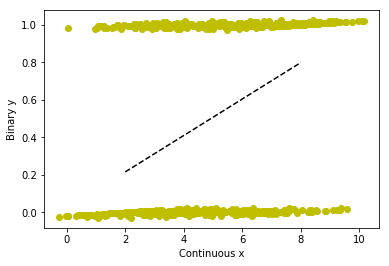

In [9]:
jitter = np.random.randn(700)

plt.plot(x + jitter, bin_y + jitter / 100, "yo", x, fit_fn(x), "--k")
plt.xlabel("Continuous x")
plt.ylabel("Binary y")
plt.show()

In [10]:
xvals = x.unique()

yodds = []

for xi in xvals:
    y1_ct = bin_y[x == xi].sum()
    y0_ct = len(bin_y[x == xi]) - y1_ct
    yodds.append(y1_ct / y0_ct)

In [13]:
fit = np.polyfit(xvals,yodds,1)
fit_fn = np.poly1d(fit)

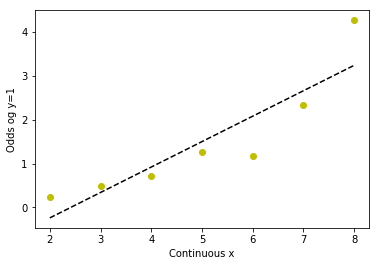

In [14]:
plt.plot(xvals, yodds, "yo", xvals, fit_fn(xvals), "--k")
plt.xlabel("Continuous x")
plt.ylabel("Odds og y=1")
plt.show()

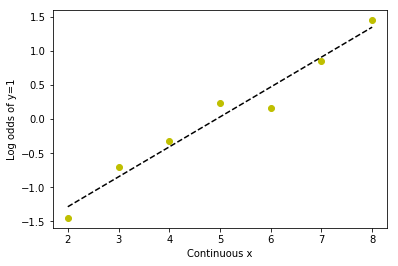

In [15]:
ln_yodds = np.log(yodds)

fit = np.polyfit(xvals,ln_yodds, 1)
fit_fn = np.poly1d(fit)

plt.plot(xvals, ln_yodds, "yo", xvals, fit_fn(xvals), "--k")
plt.xlabel("Continuous x")
plt.ylabel("Log odds of y=1")
plt.show()

In [ ]:
logit(HasHearingProblem)=−1+.02∗age+1∗male


In [16]:
1 + (.2*95)

20.0

In [17]:
1 + (.2*50) + 1

12.0

In [18]:
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

# Take a pe
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


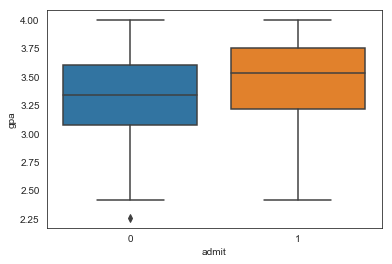

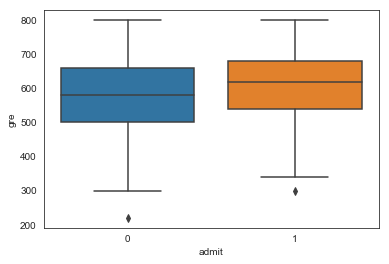

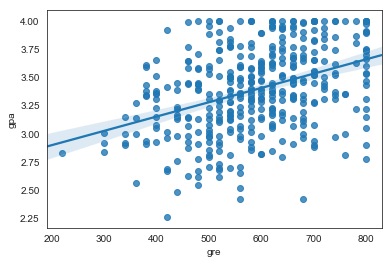

In [20]:
sns.set_style("white")
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x = "admit", y="gre", data=df)
plt.show()

sns.regplot(x = "gre", y="gpa", data=df)
plt.show()


In [23]:
X_statsmod = df[["gre", "gpa"]]

X_statsmod["intercept"] = 1

logit = sm.Logit(df["admit"], X_statsmod)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Nov 2018   Pseudo R-squ.:                 0.03927
Time:                        15:36:46   Log-Likelihood:                -240.17
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 5.456e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0027      0.001      2.544      0.011       0.001       0.005
gpa            0.7547      0.

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
pred_statsmod = result.predict(X_statsmod)

pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

table = pd.crosstab(df["admit"], pred_y_statsmod)

print("Accuracy by admission status")
print(table)
print("\n Percentage accuracy")
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))

Accuracy by admission status
col_0    0   1
admit         
0      263  10
1      118   9

 Percentage accuracy
0.68


In [25]:
lr = LogisticRegression(C=1e9)
y = df["admit"]
X = df[["gpa", "gre"]]

fit = lr.fit(X,y)

print("coefficients")
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print("\n Accuracy by admission status")
print(pd.crosstab(pred_y_sklearn, y))

print("\n Percentage accuracy")
print(lr.score(X,y))

coefficients
[[0.74747563 0.00267019]]
[-4.91157158]

 Accuracy by admission status
admit    0    1
row_0          
0      263  118
1       10    9

 Percentage accuracy
0.68
